# Research on apartment sales ads
> Learning how to explore datasets using apartment sales data.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Map_spb_1744_high.jpg/260px-Map_spb_1744_high.jpg)


- toc: true
- badges: true
- comments: true
- sticky_rank: 1
- author: Jordan Wilheim
- image: https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Map_spb_1744_high.jpg/260px-Map_spb_1744_high.jpg
- categories: [eda, jupyter]

I'll be using an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. I'll focus on __determining the market value of real estate properties__. 

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

## Examine file

In [1]:
#collapse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import missingno as msno
from scipy import signal
import seaborn as sns


In [2]:
#collapse
from pathlib import Path

file = Path("../datasets/real_estate_data_eng.csv")

df = pd.read_csv(file, sep="\t")

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
((df.isna().mean() * 100).round(2).rename("Percent Missing").sort_values())

total_images             0.00
open_plan                0.00
floor                    0.00
rooms                    0.00
studio                   0.00
total_area               0.00
last_price               0.00
first_day_exposition     0.00
locality_name            0.21
floors_total             0.36
living_area              8.03
kitchen_area             9.61
days_exposition         13.42
ponds_around3000        23.28
parks_around3000        23.28
cityCenters_nearest     23.29
airports_nearest        23.38
ceiling_height          38.80
balcony                 48.61
ponds_nearest           61.56
parks_nearest           65.91
is_apartment            88.29
Name: Percent Missing, dtype: float64

In [5]:
df[["parks_around3000", "parks_nearest"]].query("parks_around3000 == 0")

,parks_around3000,parks_nearest
1,0.0,NaN
6,0.0,NaN
7,0.0,NaN
9,0.0,NaN
11,0.0,NaN
...,...,...
23684,0.0,NaN
23685,0.0,NaN
23687,0.0,NaN
23688,0.0,NaN


In [6]:
df[["parks_around3000", "parks_nearest"]].query("parks_nearest.isnull()").groupby(
    "parks_around3000"
).size()

parks_around3000
0.0    10102
dtype: int64

Only zero values when parks around 3000 is null value. I'll reassign parks_nearest to 0 

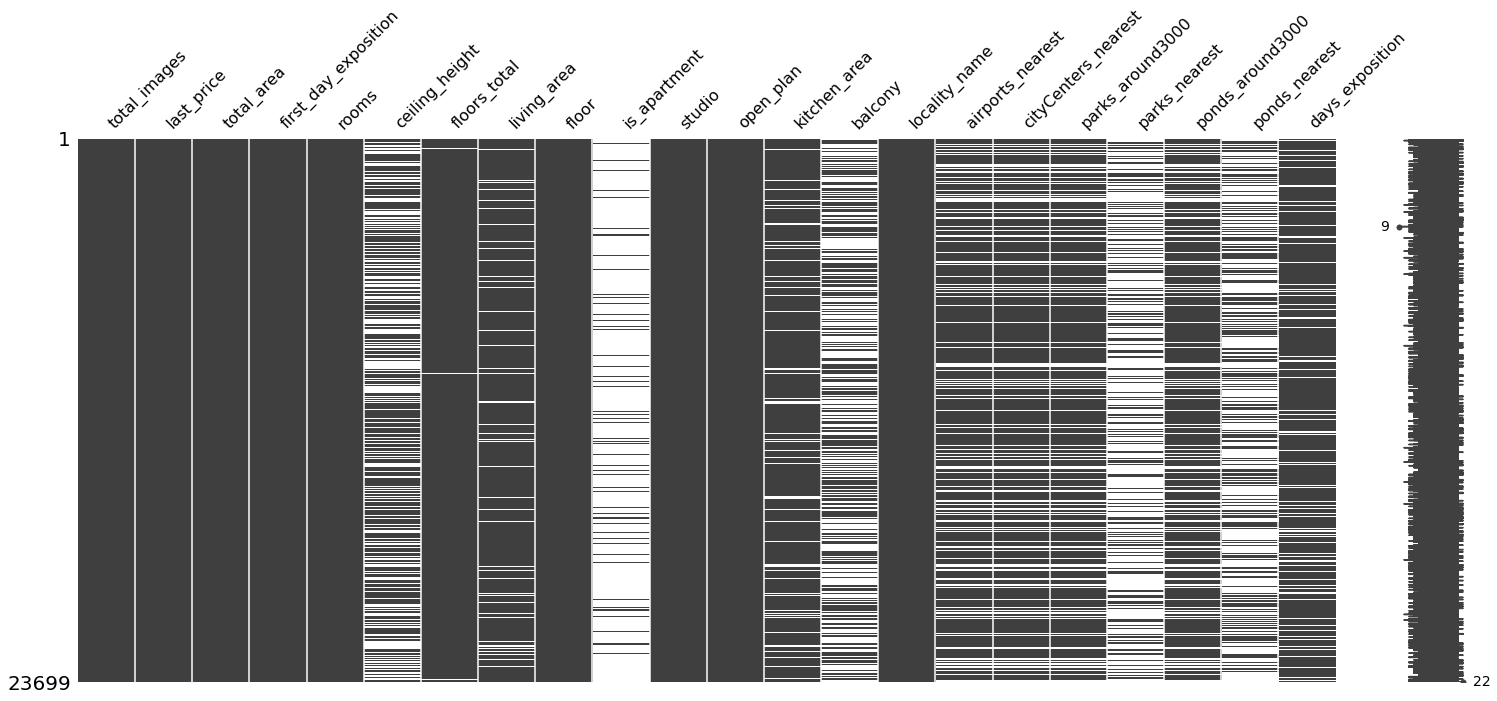

In [7]:
msno.matrix(df)

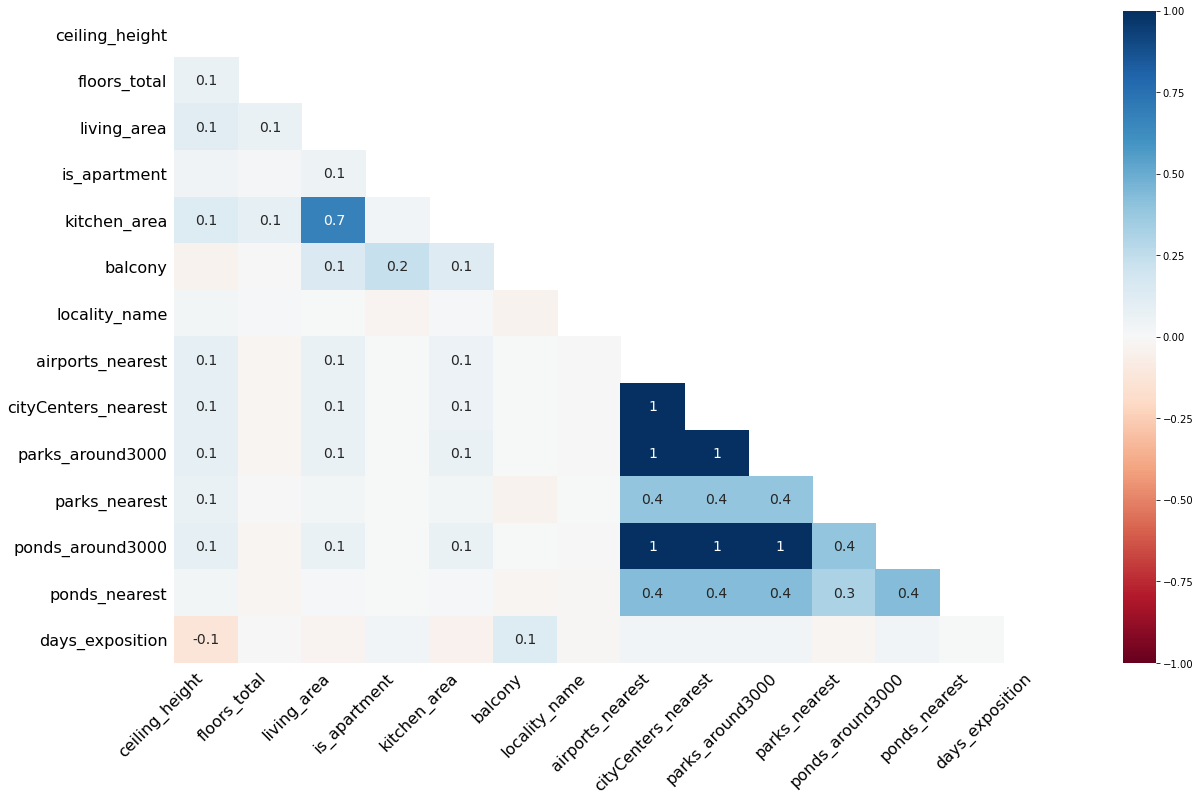

In [8]:
msno.heatmap(df)

In [9]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Conclusion

-  The data file is tab separated in defiance of it's extention of csv.
-  A large proportion of `is_apartment` column missing.

## Data preprocessing
### Missing Value Analysis
#### is_aparment

Around 88% of this data is missing, and it's unclear what that value may be, as both boolean values exist within the data. 

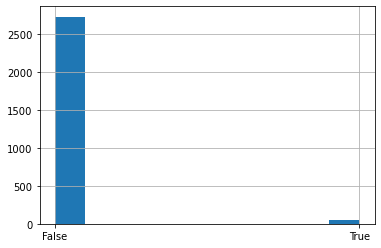

In [11]:
df["is_apartment"].dropna().astype(str).hist()

I've decided to drop this feature from my analysis, as i'm not confident that imputation can 'rescue' the distribution of this sample. 

In [12]:
df = df.drop("is_apartment", axis=1)

#### parks_nearest and ponds_nearest
parks and ponds nearest columns contain a large proportion of missing data as well, with around 66% and 62% respectively. 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1163e2130>,
      dtype=object)

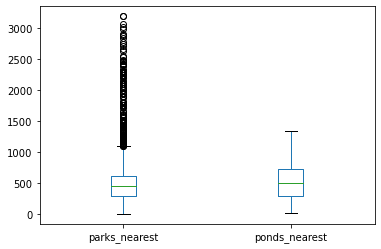

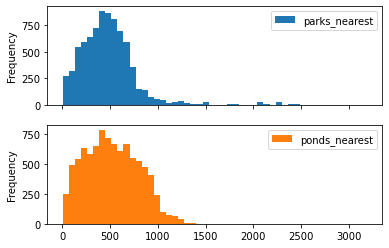

In [13]:
df[["parks_nearest", "ponds_nearest"]].plot(kind="box")
df[["parks_nearest", "ponds_nearest"]].plot(kind="hist", subplots=True, bins=50)

Interestingly, there are many outliers in the `parks_nearest` column, and that trend isn't present for `ponds nearest` both contain a long tail where a median imputation would be most appropriate in an attempt to represent the distribution of this sample. What does this distribution look like after imputation?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11648a070>,
      dtype=object)

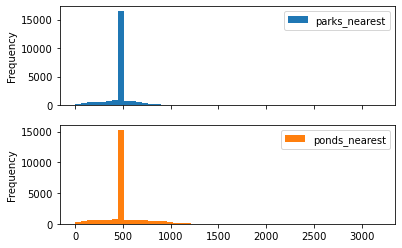

In [14]:
park_pond_imputation = dict(df[["parks_nearest", "ponds_nearest"]].median())
df[["parks_nearest", "ponds_nearest"]] = df[["parks_nearest", "ponds_nearest"]].fillna(
    park_pond_imputation
)
df[["parks_nearest", "ponds_nearest"]].plot(kind="hist", subplots=True, bins=50)
# df['first_day_exposition'].head()

It seems strange to impute such a large proportion of the data. We will leave it in for now. 

##### balcony, floors_total, living_area, kitchen_area, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, days_exposition, ceiling_height

Due to the rough poisson distribtion, the tails are going to be uneven, and a median may be the best measure of central tendancy. 

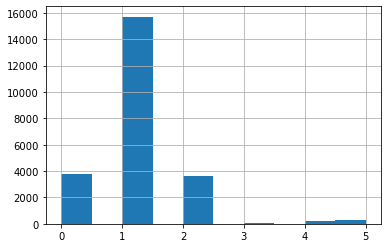

In [15]:
df["balcony"].fillna(df["balcony"].median(), inplace=True)
df["balcony"].hist()
plt.show()

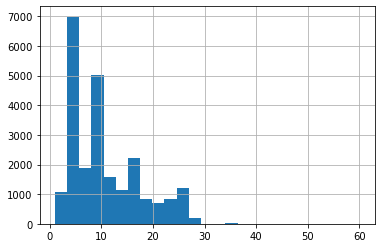

In [16]:
df["floors_total"].fillna(df["floors_total"].median(), inplace=True)
df["floors_total"].hist(bins=25)
plt.show()

Mode seems to be the most appropriate measure to fill the missing values in balcony.

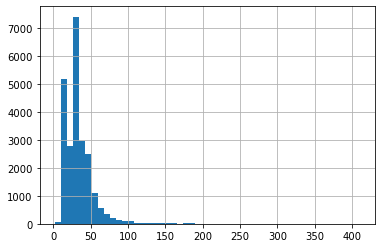

In [17]:
df["living_area"].fillna(df["living_area"].median(), inplace=True)
df["living_area"].hist(bins=50)

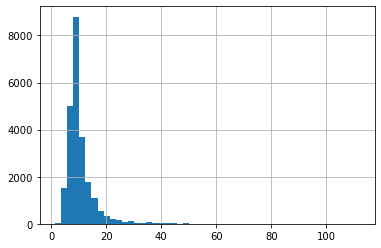

In [18]:
df["kitchen_area"].fillna(df["kitchen_area"].median(), inplace=True)
df["kitchen_area"].hist(bins=50)

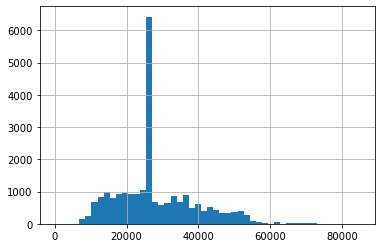

In [19]:
df["airports_nearest"].fillna(df["airports_nearest"].median(), inplace=True)
df["airports_nearest"].hist(bins=50)

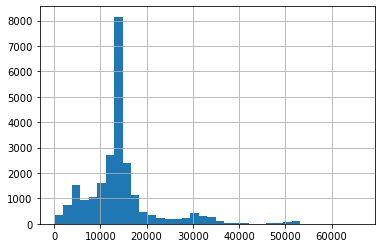

In [20]:
df["cityCenters_nearest"].fillna(df["cityCenters_nearest"].median(), inplace=True)
df["cityCenters_nearest"].hist(bins=36)

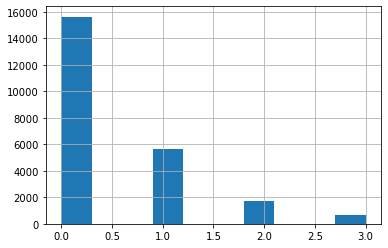

In [21]:
df["parks_around3000"].fillna(df["parks_around3000"].median(), inplace=True)
df["parks_around3000"].hist()

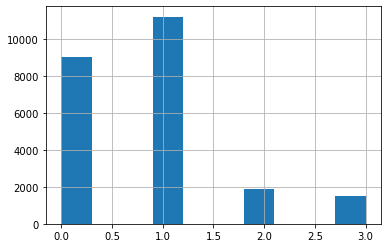

In [22]:
df["ponds_around3000"].fillna(df["ponds_around3000"].median(), inplace=True)
df["ponds_around3000"].hist()

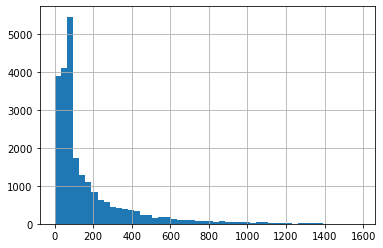

In [23]:
df["days_exposition"].fillna(df["days_exposition"].median(), inplace=True)
df["days_exposition"].hist(bins=50)

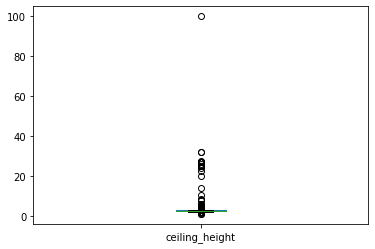

In [24]:
df["ceiling_height"].plot(kind="box")

Somone has quite the ceiling! 

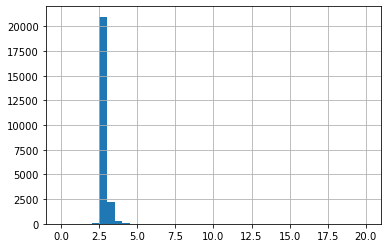

In [25]:
df["ceiling_height"].fillna(df["ceiling_height"].median(), inplace=True)
df["ceiling_height"].hist(bins=40, range=(0, 20))

#### Locality name

Let's fill in NA values with 'Unknown' string. 

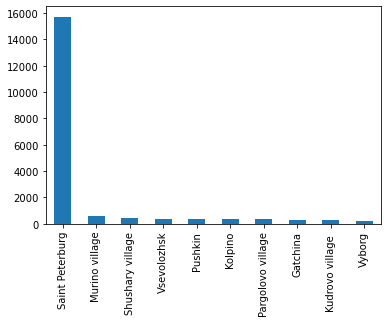

In [26]:
df["locality_name"].fillna("Unknown", inplace=True)
df["locality_name"].value_counts().head(10).plot(kind="bar")

Let's make sure we took care of all na values

In [27]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

We can convert `first_day_exposition` to a datetime dtype

In [28]:
df["first_day_exposition"] = pd.to_datetime(
    df["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S"
)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   studio                23699 non-null  bool          
 10  open_plan             23699 non-null  bool          
 11  kitchen_area          23699 non-null  float64       
 12  balcony               23699 non-null  float64       
 13  locality_name   

### Type conversions

#### Which float values should be int values?
We can determine this by looking for columns that can be represented by an integer type without losing information. 

In [30]:
decimal_vals = ((df.loc[:, df.dtypes == float] % 1) != 0).sum().sort_values()

replace_types = decimal_vals.map({0: "int64"}).dropna()

decimal_vals

last_price                 0
floors_total               0
balcony                    0
airports_nearest           0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3997
cityCenters_nearest     5519
living_area            10978
total_area             11249
kitchen_area           13776
ceiling_height         22509
dtype: int64

Based on the data from the code book, days_exposition should be represented as an integer. 

In [31]:
decimal_vals.drop("days_exposition", inplace=True)

In [32]:
df = df.astype(replace_types.to_dict()).assign(
    days_exposition=df["days_exposition"].round().astype(int)
)

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,1,Saint Peterburg,18863,16028.0,1,482,2,755,95
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,Shushary village,12817,18603.0,0,455,0,502,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Saint Peterburg,21741,13933.0,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,9.1,0,Saint Peterburg,28098,6800.0,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,1,Saint Peterburg,31856,8098.0,2,112,1,48,121


## Transformations

### Assign: Price per square meter


In [33]:
df["price_per_sq_meter"] = df["last_price"] / df["total_area"]

### Assign:  day of week, month, and year.

In [34]:
df["day_of_week"] = df["first_day_exposition"].dt.dayofweek
df["month"] = df["first_day_exposition"].dt.month
df["year"] = df["first_day_exposition"].dt.year

### Assign : floor type (top, bottom, other)

In [35]:
def gen_floor_type(x):
    if x["floors_total"] == 1:
        return "bottom"
    elif x["floors_total"] == x["floor"]:
        return "top"
    else:
        return "other"


df = df.assign(floor_type=df.apply(gen_floor_type, axis=1))

### Assign: living space to total area ratio, kitchen space to total area ratio

In [36]:
df["living_space_ratio"] = df["living_area"] / df["total_area"]
df["kitchen_space_ratio"] = df["kitchen_area"] / df["total_area"]

## EDA

### Examining total_area, last_price, rooms, and ceiling_height.

Plotting a histogram is a great way to understand the distribution of a feature.

We will try to use these features to help understand how price relates to total area, number of rooms, and ceiling height. 

In [ ]:
cols_of_interest = ["total_area", "last_price", "rooms", "ceiling_height"]
pd.plotting.scatter_matrix(df[cols_of_interest], figsize=(10, 10))
plt.show()

In [ ]:
df[cols_of_interest].describe()

### Examining the numer of days it takes to sell an apartment

In [ ]:
df["days_exposition"].hist(bins=50)

In [ ]:
df["days_exposition"].describe()

In [ ]:
df["days_exposition"].plot(kind="box")

The average time it takes to complete a sale is around 95 days. The interquartile range allows us to determine what are considered unusally quick or long sales. 
Anything less than 45 days or more than 199 days is outside the interquartile range.

### Removal of rare and outlying values.

I'll remove outlying values for our columns of interest in order to have a better understanding of how these features will affect the price. 



Density of names is quite small for most here. I'll drop the 250 rarest localities. 


In [ ]:
def get_iqr(series):
    iqr = series.quantile(0.75) - series.quantile(0.25)
    return iqr


def get_wiskers(series):
    low_out = series.quantile(0.25) - (1.5 * get_iqr(series))
    high_out = series.quantile(0.75) + (1.5 * get_iqr(series))
    return low_out, high_out


def mask_outliers(series):
    return series.where(series.between(*get_wiskers(series)))

Let's test this function:

In [ ]:
df[cols_of_interest].apply(get_wiskers)

In [ ]:
df[cols_of_interest].apply(mask_outliers)

Looks good! 

In [ ]:
pd.plotting.scatter_matrix(
    df[cols_of_interest].apply(mask_outliers), figsize=(10, 10), alpha=0.1
)
plt.show()

The trends are much clearer here. There's a clear coreleation between last price and total area as well as number of rooms, with the strongest linear correlation coupled to total area.

In [ ]:
sns.heatmap(df[cols_of_interest].apply(mask_outliers).corr(), annot=True)

In [ ]:
df["floor_type"]

Let's add some more interesting features to our analysis. 

In [ ]:
df[["cityCenters_nearest", "day_of_week", "month", "year"]].describe()

Let's remove outliers from cityCenters_nearest as well

In [ ]:
cols_of_interest = cols_of_interest + ["cityCenters_nearest"]

Remove outliers from analysis

In [ ]:
pd.plotting.scatter_matrix(
    df[cols_of_interest]
    .apply(mask_outliers)
    .join(df[["day_of_week", "month", "year"]]),
    figsize=(20, 20),
    alpha=0.2,
)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df[cols_of_interest]
    .apply(mask_outliers)
    .join(df[["day_of_week", "month", "year"]])
    .corr(),
    annot=True,
)
plt.show()

In [ ]:
df.set_index("first_day_exposition")["last_price"].resample("y").median().plot()

Theres a slight correlation with proximity to city centers and no clear linear relationship between time related values recorded. 

In [ ]:
top10_localities = df["locality_name"].value_counts().iloc[:10].index
locality_analysis = df.query("locality_name in @top10_localities").pivot_table(
    index=["locality_name"], values=["price_per_sq_meter"], aggfunc=["median", "count"]
)
locality_analysis.columns = ["median_price_per_sq_meter", "num_occurences"]

In [ ]:
locality_analysis.sort_values("median_price_per_sq_meter", ascending=False).assign(
    median_price_per_sq_meter=locality_analysis["median_price_per_sq_meter"].round(2)
)

The highest median price per square meter is Saint Peterburg, and Vyborg being the most affordable. 

In [ ]:
df.query('locality_name == "Saint Peterburg"')[
    ["cityCenters_nearest", "last_price"]
].plot(kind="scatter", x="cityCenters_nearest", y="last_price")

In [ ]:
index_range = (
    df.query('locality_name == "Saint Peterburg"')["cityCenters_nearest"]
    .agg(["min", "max"])
    .add([0, 1])
    .astype(int)
    .tolist()
)
downtown_interp = (
    df.query('locality_name == "Saint Peterburg"')[["cityCenters_nearest"]]
    .join((df["last_price"] / df["cityCenters_nearest"]).rename("pr_per_nearest_km"))
    .round({"cityCenters_nearest": 0})
    .astype({"cityCenters_nearest": int})
    .pivot_table(
        index="cityCenters_nearest", values="pr_per_nearest_km", aggfunc="median"
    )
    .reindex(range(*index_range))
    .interpolate(method="spline", order=2)
    .diff()
    .rolling(window=300, win_type="triang")
    .mean()
)

In [ ]:
peak_x = signal.find_peaks(downtown_interp.values.flatten(), height=200)[0]

In [ ]:
downtown_interp.plot(style="b", xlim=(0, 3000))
for peak in downtown_interp.iloc[peak_x].index.tolist():
    plt.axvline(peak)

There seem to be two areas where the price will sharply change. I'm going to use 540 km as the downtown limit. 

In [ ]:
downtown_interp.iloc[peak_x]

In [ ]:
downtown_limit = 574
city_center_df = df.query(
    "cityCenters_nearest < @downtown_limit & locality_name == 'Saint Peterburg'"
)
sns.heatmap(
    city_center_df[["total_area", "last_price", "rooms", "ceiling_height"]].corr(),
    annot=True,
)

Rooms and price have a strong correlation between total area. 

In [ ]:
city_center_price_df = city_center_df[
    ["last_price", "rooms", "floor", "cityCenters_nearest", "first_day_exposition"]
]

In [ ]:
sns.heatmap(city_center_price_df.corr(), annot=True)

In [ ]:
city_center_price_df.set_index("first_day_exposition")["last_price"].resample(
    "y"
).median().plot()

It seems like 2016 had prices that were very low, and steadily increased each year. 

### Step 5. Overall conclusion

There doesn't seem to be a dramatic change in overall trends when comparing the instances near St. Petersburg city center and the entire dataset. 

It most dramatic trend seems to be how publication year and price trended. There seems to be a much stronger increase in median price per year in the St. Petersburg city center values from 2016 to 2019.